# Project - Airline Sentiment Analysis
---------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords,wordnet
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

# Dataset: Airline sentiment

A dataset for US airlines comments analysis,Tweets analysis on Kaggle (<a href="https://www.kaggle.com/datasets/welkin10/airline-sentiment">See dataset page</a>)

### About Dataset
#### Context:
    - This is US airlines data which contain comments of passengers on basis of service provided by airlines.
--------------------------------------------------------------------------------
#### Inspiration:
    -you can use it for sentiment analysis .
---------------------------------------------------------------------------------

# Importing Dataset

In [4]:
dataset=pd.read_csv('Dataset/airline data.csv')
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
print(len(dataset.columns))
dataset.columns

15


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
text=dataset['text'].values
text=[word_tokenize(doc) for doc in text]

In [6]:
text[0]

['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']

In [12]:
for i in ['airline_sentiment']:
    print(i,dataset[i].unique())

airline_sentiment ['neutral' 'positive' 'negative']


In [7]:
sentiment=dataset['airline_sentiment'].values #'neutral' 'positive' 'negative'

In [14]:
dataset.shape

(14640, 15)

In [8]:
documents=[(text[i],sentiment[i]) for i in range(dataset.shape[0])]

In [9]:
documents[0]

(['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'], 'neutral')

# Dataset Preprocessing
1. TOKENIZING
2. LEMMATIZING
3. REMOVING STOPWORDS
4. PUNCTUATIONS

In [10]:
lemmatizer=WordNetLemmatizer()

In [11]:
def get_simple_pos(tag):   
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [12]:
stops=set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [13]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [14]:
document = [(clean_review(doc), category) for doc, category in documents]

In [29]:
document[0]

(['virginamerica', 'dhepburn', 'say'], 'neutral')

In [30]:
print("The clean dataset is \n")
for i in document:
    print(i)

Streaming output truncated to the last 5000 lines.
(['usairways', 'mention', 'fact', 'flight', 'delayed', 'computers'], 'negative')
(['usairways', 'add', 'frequent', 'flyer', 'number', 'website', 'help'], 'negative')
(['usairways', 'get', 'plane', 'wait', 'hour', 'half', 'speak', 'someone', 'reflight', 'booking', 'problems'], 'negative')
(['usairways', 'please', "n't", 'trivialize', 'joke', 'slow', 'day', 'slow', 'experience'], 'negative')
(['usairways', '1', 'agent', 'phx', 'customer', 'service', 'desk', 'hour', 'ago', 'line', '100', 'people', 'long'], 'negative')
(['usairways', 'sorry', "n't", 'help', "'s", 'midnight', 'pst', 'hell', 'still', 'hold', '90', 'minute', 'customer', 'service', 'line'], 'negative')
(['usairways', 'like', 'thought', 'america', 'us', 'airways', 'start', 'operating', 'rule', 'communist', 'russia'], 'negative')
(['usairways', 'guy', 'nice', 'give', 'route', 'jet', 'blue', 'southwest', 'least', 'treat', 'customer', 'properly'], 'negative')
(['usairways', 'nope'

In [15]:
categories = [category for document, category in document]

In [32]:
categories[:10]

['neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive']

In [16]:
text_documents = [" ".join(document) for document, category in document]

In [34]:
text_documents[0]

'virginamerica dhepburn say'

# SPLITTING THE DATASET

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_documents, categories,test_size=0.3,random_state=0)

# Vectorization to get the maximum number of frequency words

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
count_vect=TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
X_train_features=count_vect.fit_transform(X_train)
X_test_features=count_vect.transform(X_test)

In [20]:
import pickle

with open('tfidf.pickle', 'wb') as f:
    pickle.dump(count_vect, f)

# Helper funcation

In [21]:
from sklearn.metrics import accuracy_score
def eval_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    print(model.__class__.__name__)
    print('acc train:', acc_train)
    print('acc test:', acc_test)
    print('----------------------------')
    
    return(acc_train,acc_test)

# USING Svm CLASSIFIER

In [22]:
clf = SVC(degree=11)
acc_tarin , acc_test = eval_model(clf,X_train_features,y_train,X_test_features,y_test)

SVC
acc train: 0.927400468384075
acc test: 0.7786885245901639
----------------------------


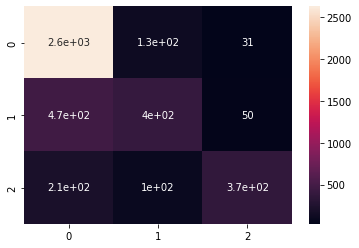

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
y_pred=clf.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()


# USING RANDOM FOREST CLASSIFIER 

In [23]:
clf1=RandomForestClassifier(n_estimators=100, n_jobs=-1)
acc_tarin1,acc_test1=eval_model(clf1,X_train_features,y_train,X_test_features,y_test)
 

RandomForestClassifier
acc train: 0.9917056986729118
acc test: 0.7540983606557377
----------------------------


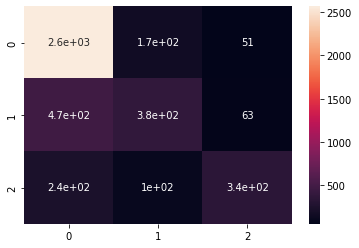

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
y_pred1=clf1.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)
plt.show()


# USING KNeighborsClassifier 

In [24]:
clf2=KNeighborsClassifier(n_neighbors=57)
acc_tarin2,acc_test2=eval_model(clf2,X_train_features,y_train,X_test_features,y_test)

KNeighborsClassifier
acc train: 0.750975800156128
acc test: 0.7461293260473588
----------------------------


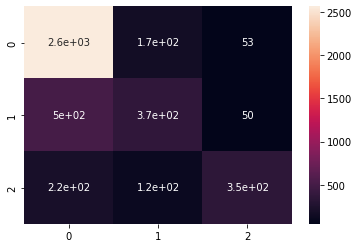

In [62]:
y_pred2=clf2.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True)
plt.show()


# USING BernoulliNB Classifier

In [25]:
clf3=BernoulliNB()
acc_tarin3,acc_test3=eval_model(clf3,X_train_features,y_train,X_test_features,y_test)


BernoulliNB
acc train: 0.8033762685402029
acc test: 0.7607012750455373
----------------------------


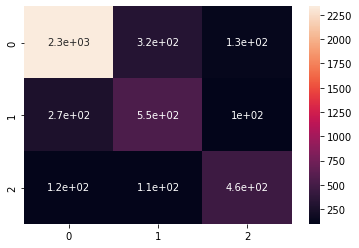

In [64]:
y_pred3=clf3.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True)
plt.show()


# USING LogisticRegression

In [26]:
clf4=LogisticRegression(max_iter=100,random_state=0)
acc_tarin4,acc_test4=eval_model(clf4,X_train_features,y_train,X_test_features,y_test)

LogisticRegression
acc train: 0.8291373926619828
acc test: 0.7841530054644809
----------------------------


F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


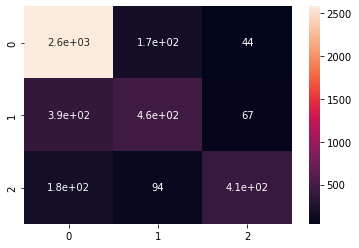

In [65]:
y_pred4=clf4.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred4)
sns.heatmap(cm,annot=True)
plt.show()


# USING MultinomialNB Classifier

In [27]:
clf5=MultinomialNB()
acc_tarin5,acc_test5=eval_model(clf5,X_train_features,y_train,X_test_features,y_test)

MultinomialNB
acc train: 0.773224043715847
acc test: 0.75591985428051
----------------------------


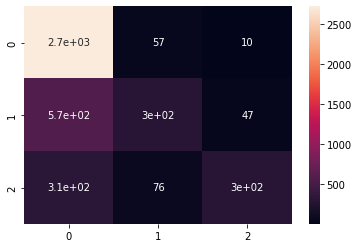

In [66]:
y_pred5=clf5.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred5)
sns.heatmap(cm,annot=True)
plt.show()


# Making Voting to five Models

In [28]:
estimators = [
    ('Svm',clf),
    ('RANDOM FOREST', clf1),
    ('KNN', clf2),
    ('BernoulliNB', clf3),
    ('LogisticRegression',clf4),
    ('MultinomialNB',clf5)
]

voting_clf = VotingClassifier(estimators)

In [29]:
all_estimators = estimators + [('voting', voting_clf)]

final_results = {
    'model': [],
    'acc train': [],
    'acc test': []
}

for (name, clf) in all_estimators:
    acc_train, acc_test = eval_model(
        clf, X_train_features,y_train,X_test_features,y_test
    )
    final_results['model'].append(name)
    final_results['acc train'].append(acc_train)
    final_results['acc test'].append(acc_test)

SVC
acc train: 0.927400468384075
acc test: 0.7786885245901639
----------------------------
RandomForestClassifier
acc train: 0.991608118657299
acc test: 0.75
----------------------------
KNeighborsClassifier
acc train: 0.750975800156128
acc test: 0.7461293260473588
----------------------------
BernoulliNB
acc train: 0.8033762685402029
acc test: 0.7607012750455373
----------------------------


F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
acc train: 0.8291373926619828
acc test: 0.7841530054644809
----------------------------
MultinomialNB
acc train: 0.773224043715847
acc test: 0.75591985428051
----------------------------


F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier
acc train: 0.8564597970335676
acc test: 0.7727686703096539
----------------------------


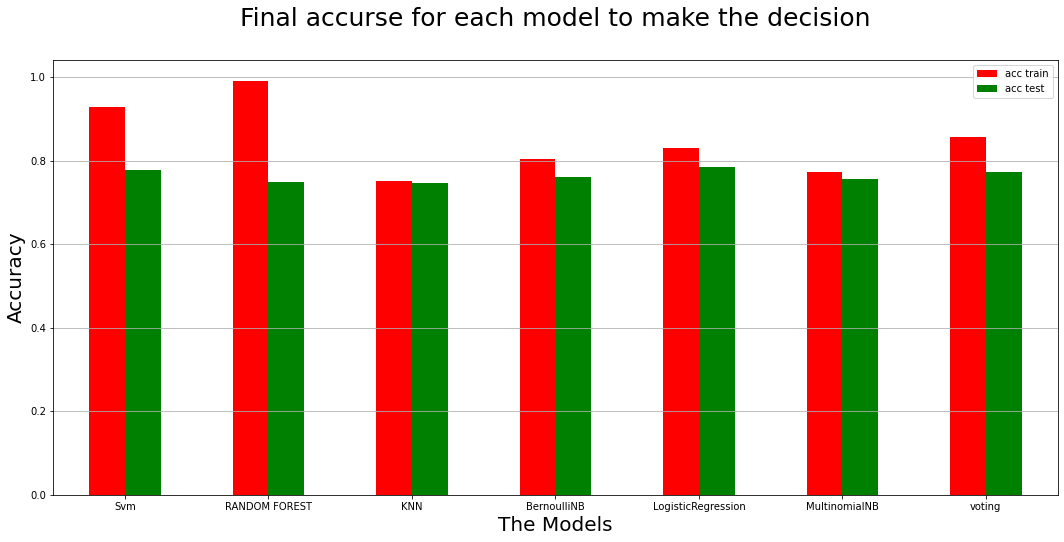

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

final_results=pd.DataFrame(final_results)
final_results.plot.bar(x='model',y=['acc train','acc test'],color=['red','green'],
                       figsize=(18,8),width=0.5)
plt.xticks(rotation=360)
plt.title('Final accurse for each model to make the decision\n',fontsize=25)
plt.xlabel('The Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()

In [33]:
final_results.sort_values(by='acc test', ascending=False, ignore_index=True, inplace=True)
final_results

,model,acc train,acc test
0,LogisticRegression,0.829137,0.784153
1,Svm,0.927400,0.778689
2,voting,0.856460,0.772769
3,BernoulliNB,0.803376,0.760701
4,MultinomialNB,0.773224,0.755920
5,RANDOM FOREST,0.991608,0.750000
6,KNN,0.750976,0.746129


# Final Test

In [34]:
final_model=LogisticRegression(max_iter=100,random_state=0)
acc_tarin4,acc_test4=eval_model(final_model,X_train_features,y_train,X_test_features,y_test)

LogisticRegression
acc train: 0.8291373926619828
acc test: 0.7841530054644809
----------------------------


F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Save Model

In [35]:
import pickle
with open('saved-model.pickle', 'wb') as f:
    pickle.dump(final_model, f)

# Check The Model After Load

In [38]:
import pickle

with open('saved-model.pickle', 'rb') as f:
    my_model = pickle.load(f)
    
with open('tfidf.pickle', 'rb') as f:
    my_feature = pickle.load(f)

In [52]:
randnum=np.random.randint(1,1000)
sentence=X_test[randnum]
print(sentence)
sentence_features=X_test_features[randnum]
print(sentence_features)
test_val=my_model.predict(X_test_features[0])
print(test_val)

united 50 minute wait ... still gate broken jetway might miss connection
  (0, 32)	0.38881356274810724
  (0, 173)	0.40294269807347366
  (0, 255)	0.341835135252063
  (0, 476)	0.2773267866628463
  (0, 671)	0.3943230005655678
  (0, 681)	0.30290961673220884
  (0, 682)	0.2947610603189593
  (0, 986)	0.2668189760728042
  (0, 1092)	0.14625188324638688
  (0, 1118)	0.2568829743072884
['negative']


# ♥♥ End of Code ♥♥